In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from math import pi
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

# Dense coding protocol

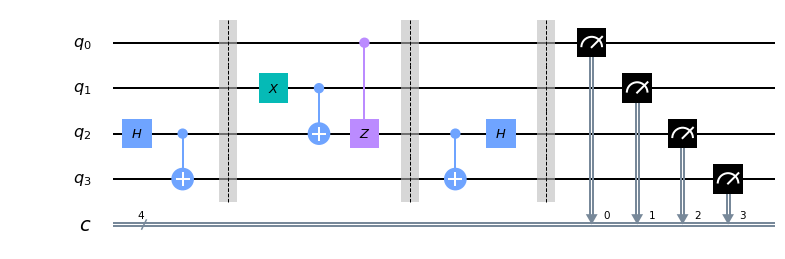

In [2]:
circ = QuantumCircuit(4, 4)
circ.h(2)
circ.cx(2, 3)
circ.barrier()
circ.x(1)
circ.cx(1, 2)
circ.cz(0, 2)
circ.barrier()
circ.cx(2, 3)
circ.h(2)
circ.barrier()
circ.measure([0,1,2,3],[0,1,2,3])
circ.draw()

Algorytm gęstego kodowania pozwala nam na przesłanie wartości dwóch klasycznych bitów, wysyłając tylko jeden qubit. Na początku tworzymy stan splątany (na rys. są to bramki do pierwszej bariery). Następnie jeden qubit (q_2) przesyłamy na jeden koniec kanału a drugi qubit (q_3) na drugi koniec kanału. Kodujemy wartość naszego klasycznego bitu za pomocą bramek CNOT oraz Z (wykorzystano trik z dodatkowymi qubitami; bramka NOT na qubicie q_1 służy tylko do ustawienia wartości przesyłanej informacji na |10>). Następnie przesyłamy qubit q_2 z jednego końca kanału na drugi (druga bariera). Posiadając qubity q_2 oraz q_3 możemy rozkodować wartość przesyłanej informacji, wykonując bramkę CNOT oraz H (za 2. barierą) a następnie dokonać pomiaru (pomiar qubitów q_1 oraz q_2 wykonany jest tylko w celu sprawdzenia symulacji)

{'1010': 1024}


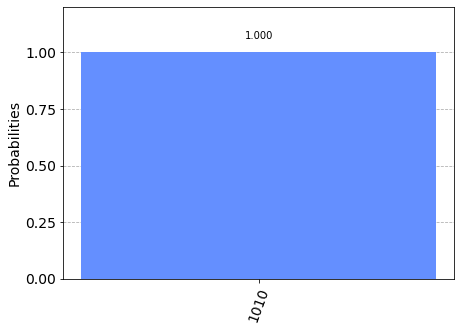

In [3]:
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(circ, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)
plot_histogram(counts)

Jak widzimy, informacja została przesłana prawidłowo

# Quantum teleportation protocol

In [4]:
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

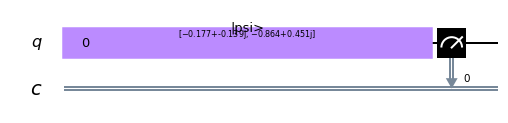

In [5]:
psi = random_state(1)
circ = QuantumCircuit(1, 1)
circ.append(Initialize(psi), [0])
circ.measure(0, 0)
circ.draw()

Algorytm teleportacji kwantowej pozwala na przesłanie nieznanego qubitu niszcząc tenże qubit. Na początku tworzymy jakiś nieznany stan, który będziemy przesyłać (psi)

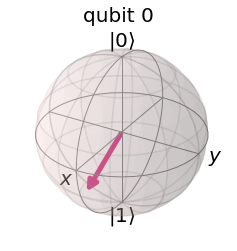

In [6]:
plot_bloch_multivector(psi)

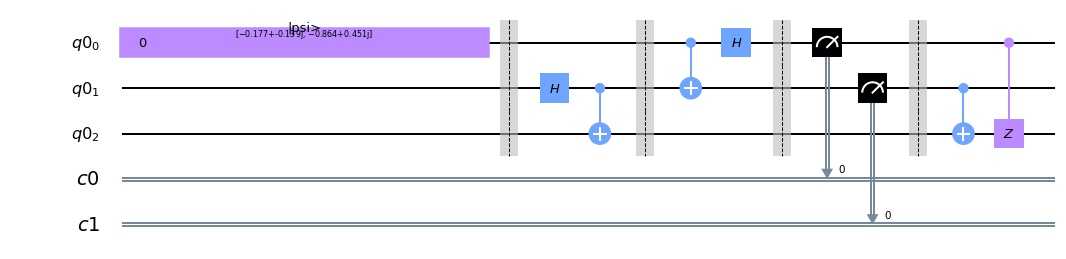

In [7]:
qr = QuantumRegister(3)
crz = ClassicalRegister(1)
crx = ClassicalRegister(1)
circ = QuantumCircuit(qr, crz, crx)
circ.append(Initialize(psi), [0])
circ.barrier()
circ.h(1)
circ.cx(1, 2)
circ.barrier()
circ.cx(0, 1)
circ.h(0)
circ.barrier()
circ.measure(0, 0)
circ.measure(1, 1)
circ.barrier()
circ.cx(1, 2)
circ.cz(0, 2)
circ.draw()

Tworzymy nasz układ do przesyłania. Na początku musimy splątać dwa qubity (na rys. za 1. barierą). Następnie przesyłamy jeden qubit (q_1) na jeden koniec kanału a drugi qubit (q_2) na drugi koneic kanału. Używając bramek CNOT oraz H zapisujemy wartość nieznanego qubitu q_0 do przesłania. (na rys. za 2. barierą). Następnie mierzymy przesyłany oraz kodowany qubit (q_0 oraz q_1; na rys. za 3. barierą) i przesyłamy klasyczną informację o otrzymanych wynikach (przesłanie klasyczne odbywa się przy 4. barierze). Na drugim koncu kanału, korzystając z przesłanej klasycznej informacji o wynikach, możemy odtworzyć stan psi, używając bramek CNOT oraz Z (wykorzystano trik z włączeniem odpowiednich bramek za pomocą mierzonych qubitów, gdyż dokonał się na nich już kolaps do jednego ze stanów).  

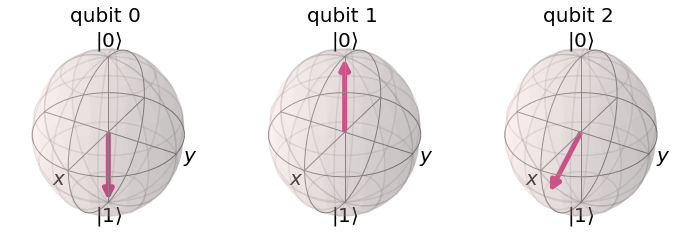

In [8]:
backend = Aer.get_backend('statevector_simulator')
out_vector = execute(circ, backend).result().get_statevector()
plot_bloch_multivector(out_vector)

Jak widzimy, nasz końcowy qubit (qubit 2) wygląda tak samo, jak qubit wejściowy (psi, zwizualizowany wyżej). Qubit wejściowy psi (czyli qubit 0) oraz qubit 1 (wykorzystany do przesłania qubitu psi) dokonały kolapsu do jednego ze stanów |0> albo |1> po pomiarze. Stan qubitu wejściowego został przesłany na drugi koniec kanału